In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
housing_original = pd.read_csv("housing.csv")

In [18]:
#Ladda in och inspektera datan
housing_original = pd.read_csv("housing.csv")

In [19]:
# .info() ger en summering av datan
housing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing_original.iloc[:, :6].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population
0,-122.23,37.88,41.0,880.0,129.0,322.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0


In [21]:
housing_original.iloc[:, 5:].head()

,population,households,median_income,median_house_value,ocean_proximity
0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,496.0,177.0,7.2574,352100.0,NEAR BAY
3,558.0,219.0,5.6431,341300.0,NEAR BAY
4,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
# Finns det fler kategorier? använd value_counts()
housing_original['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [23]:
# ta bort värdet ISLAND
housing = housing_original[housing_original['ocean_proximity'] != 'ISLAND']
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [24]:
# .get_dummies() skapar en ny kolumn för varje kategori
housing = pd.get_dummies(
    housing,
    columns=['ocean_proximity'],
    dtype=int,
    prefix='dmy'
)

In [25]:
# dmy för dummyvariabler
housing.iloc[[1, 200, 1000, 1850, 5000], 9:]

,dmy_<1H OCEAN,dmy_INLAND,dmy_NEAR BAY,dmy_NEAR OCEAN
1,0,0,1,0
200,0,0,1,0
1000,0,1,0,0
1850,0,0,0,1
5000,1,0,0,0


In [26]:
# skapa träningsdata, valideringsdata och testdata
train_full, test = train_test_split(
    housing,
    test_size=0.2,
    random_state=40
)

train, val = train_test_split(
    train_full,
    test_size=0.25,
    random_state=36
)


In [27]:
# EDA på träningsdata
# överblick över träningsdata

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12381 entries, 12054 to 14298
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12381 non-null  float64
 1   latitude            12381 non-null  float64
 2   housing_median_age  12381 non-null  float64
 3   total_rooms         12381 non-null  float64
 4   total_bedrooms      12261 non-null  float64
 5   population          12381 non-null  float64
 6   households          12381 non-null  float64
 7   median_income       12381 non-null  float64
 8   median_house_value  12381 non-null  float64
 9   dmy_<1H OCEAN       12381 non-null  int64  
 10  dmy_INLAND          12381 non-null  int64  
 11  dmy_NEAR BAY        12381 non-null  int64  
 12  dmy_NEAR OCEAN      12381 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.3 MB


In [28]:
# total_bedrooms saknar värden, vi väljer att ta bort dem
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12261 entries, 12054 to 14298
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12261 non-null  float64
 1   latitude            12261 non-null  float64
 2   housing_median_age  12261 non-null  float64
 3   total_rooms         12261 non-null  float64
 4   total_bedrooms      12261 non-null  float64
 5   population          12261 non-null  float64
 6   households          12261 non-null  float64
 7   median_income       12261 non-null  float64
 8   median_house_value  12261 non-null  float64
 9   dmy_<1H OCEAN       12261 non-null  int64  
 10  dmy_INLAND          12261 non-null  int64  
 11  dmy_NEAR BAY        12261 non-null  int64  
 12  dmy_NEAR OCEAN      12261 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.3 MB


In [29]:
# vi gör nu samma sak med valideringsdata och testdata
val = val.dropna()
test = test.dropna()


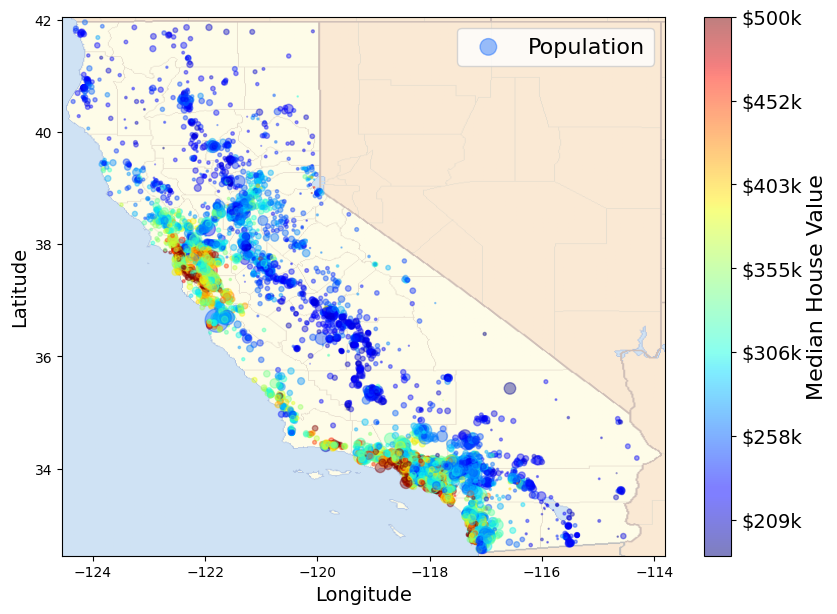

In [33]:
# visualisering
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

california_img=mpimg.imread('california.png')
ax = train.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    figsize=(10, 7),
    s=train['population']/100,
    label='Population',
    c="median_house_value",
    cmap=plt.get_cmap('jet'),
    colorbar=False,
    alpha=0.4       
)

plt.imshow(
    california_img,
    extent=(-124.55, -113.80, 32.45, 42.05),
    alpha=0.5,
    cmap=plt.get_cmap('jet')
)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = train['median_house_value']
tick_values = np.linspace(
    prices.min(),
    prices.max(),
    11
)

cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in
tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.legend(fontsize=16)